<a href="https://colab.research.google.com/github/prithvimathavan/CODSOFT/blob/main/TASK4salesprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


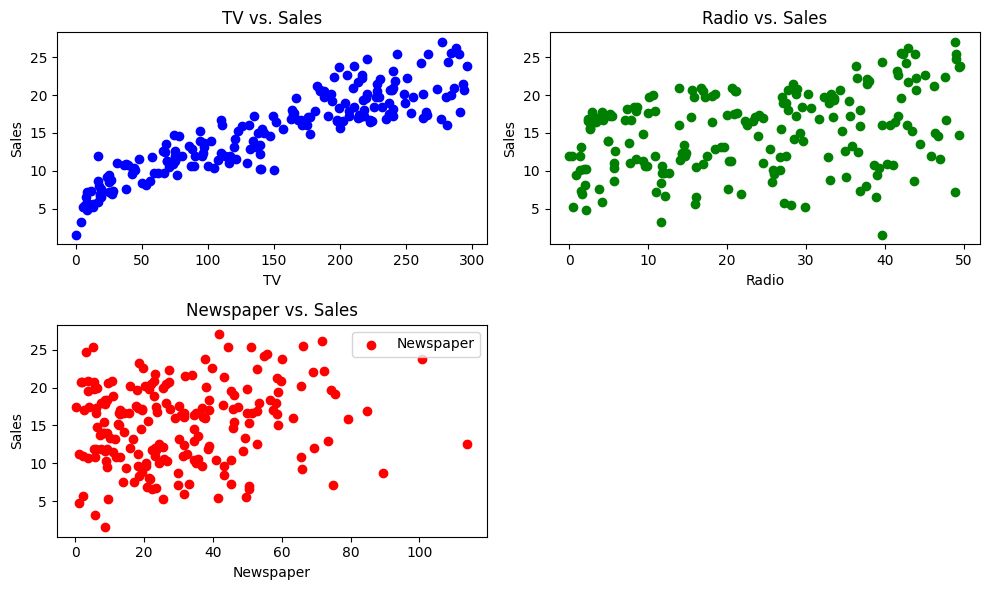

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000
Mean Squared Error (MSE): 2.907756910271093
Root Mean Squared Error (RMSE): 1.7052146229349234
R-squared: 0.9059011844150825
Predicted Sales for new data: 30.484225369188287


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('/content/advertising.csv')


print(data.head())
print(data.describe())

# Visualizations
plt.figure(figsize=(10, 6))

# Scatter plots to visualize relationships between features and sales
plt.subplot(2, 2, 1)
plt.scatter(data['TV'], data['Sales'], color='blue', label='TV')
plt.title('TV vs. Sales')
plt.xlabel('TV')
plt.ylabel('Sales')

plt.subplot(2, 2, 2)
plt.scatter(data['Radio'], data['Sales'], color='green', label='Radio')
plt.title('Radio vs. Sales')
plt.xlabel('Radio')
plt.ylabel('Sales')

plt.subplot(2, 2, 3)
plt.scatter(data['Newspaper'], data['Sales'], color='red', label='Newspaper')
plt.title('Newspaper vs. Sales')
plt.xlabel('Newspaper')
plt.ylabel('Sales')

plt.legend()
plt.tight_layout()
plt.show()

# Feature Correlation Analysis
correlation = data.corr()
print(correlation)



# Feature Scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['TV', 'Radio', 'Newspaper']])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, data['Sales'], test_size=0.2, random_state=42)

# Model Training (using Linear Regression as an example)
model = LinearRegression()
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared:', r2)

new_data = [[100, 200, 30]]
new_data_scaled = scaler.transform(new_data)
predicted_sales = model.predict(new_data_scaled)

print('Predicted Sales for new data:', predicted_sales[0])
